This Notebook is all about applying PCA and T-SNE on the famous MNIST dataset with different hyperparameters and identify which parameters are suitable to easily categorize the data.


About the MNIST dataset:

The data has 785 columns overall. 

- pixel0 to pixel784 denotes the pixel of the image (28 * 28) size has values (0 or 1)
- label denotes the number representing the image has values (0 - 9)


In [35]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv("train.csv")

print(df.head(5))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [36]:
#Separating label from the dataset

label = df['label']

# Dropping the label 
data = df.drop("label",axis=1)

print(label.shape)

print(data.shape)

(42000,)
(42000, 784)


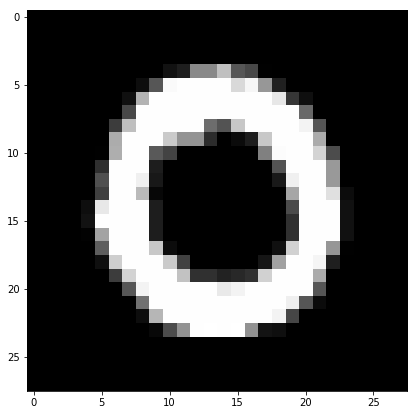

0


In [37]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 1

grid_data = data.iloc[idx].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(label[idx])

## Applying PCA in the MNIST dataset

Before applying PCA we need to standardize the data set

In [38]:
from sklearn.preprocessing import StandardScaler
standardize_data = StandardScaler().fit_transform(data)
print(standardize_data.shape)

(42000, 784)


In [39]:
from sklearn import decomposition
pca = decomposition.PCA()

pca.n_components = 2
pca_data = pca.fit_transform(standardize_data)

print(pca_data.shape)

print(label.shape)

(42000, 2)
(42000,)


### As you can see the 784 columns reducted to 2 columns using PCA 

In [40]:
import seaborn as sn

# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, label)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "labels"))


print(pca_df.head(5))

   1st_principal  2nd_principal  labels
0      -5.140453      -5.226475     1.0
1      19.292332       6.031445     0.0
2      -7.644526      -1.705845     1.0
3      -0.474305       5.835341     4.0
4      26.559560       6.023946     0.0


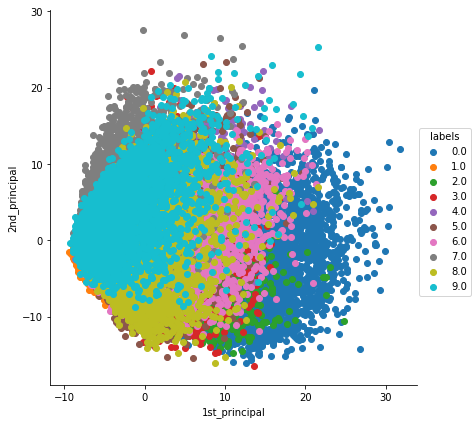

In [41]:
sn.FacetGrid(pca_df, hue="labels", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## Applying TSNE in MNIST Dataset

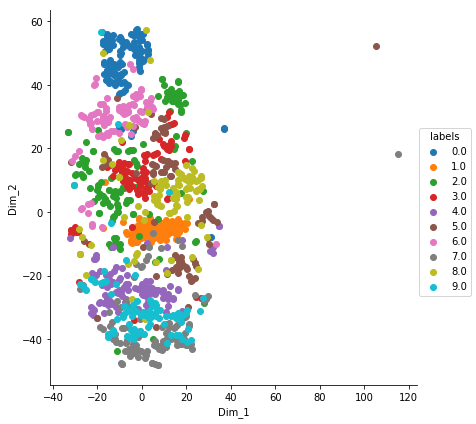

In [43]:
from sklearn.manifold import TSNE


# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = standardize_data[0:1000,:]
labels_1000 = label[0:1000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "labels"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="labels", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()


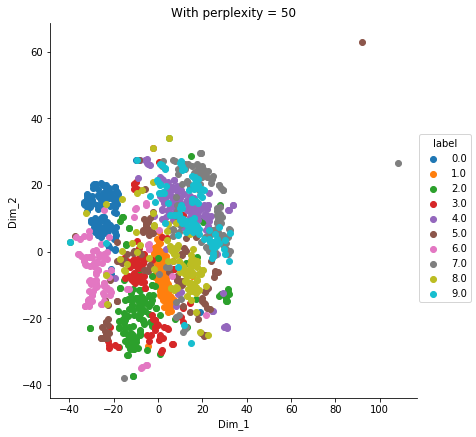

In [44]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

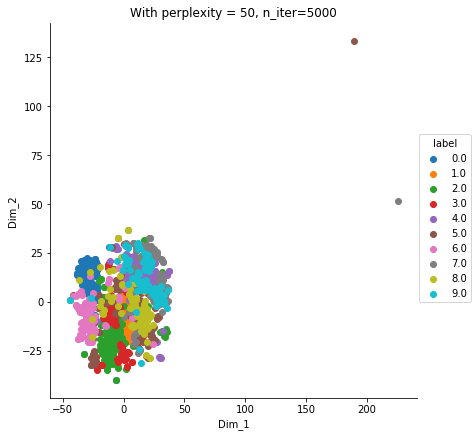

In [45]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

### So the hyper parameters 

#### Perplexity = 30
#### Learning rate = 200
#### Number of iterations for the optimization = 1000

#### Seems resonable for first 1000 points in MNIST when applying TSNE. The first graph shown were the labels are quite separated well.